<a href="https://colab.research.google.com/github/naterattner/data71200/blob/master/project_1/data71200_summer24_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python notebook for assignment 1: https://bbhosted.cuny.edu/webapps/assignment/uploadAssignment?content_id=_85452921_1&course_id=_2383576_1&group_id=&mode=view

The goal for this assignment is to create a usable dataset from an open-source data collection. This dataset will be used for a supervised classification task in Project 2 and an unsupervised learning task in Project 3.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

!pip install -U scikit-learn==1.4
!pip install mglearn
import mglearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 12.5 MB/s eta 0:00:00


### Step 1: Find and download a dataset

I'll be using this dataset on online news popularity, which contains a set of features about articles published by Mashable in a two-year period: https://archive.ics.uci.edu/dataset/332/online+news+popularity.



Some possible questions we could answer with this dataset using machine-learning techniques are:


*   Which features most significantly affect the number of shares an article receives?
*   Can we predict the number of shares an article will receive based on its publication details?
*   Do certain types of content (e.g. business, lifestyle) perform better on certain days of the week?


In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [4]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


### Step 2: Divide into a training set and a testing set

In [5]:
# Inspect the data to see whether we would want to do stratfied sampling when splitting the data
# Also make sure the dataset is big enough – we are looking for at least 10 samples per dimension or parameter/feature we are fitting (class)

print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets.value_counts())

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [9]:
# The data is fairly evenly distributed, but we can still use stratified sampling to avoid sampling bias

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42,test_size=0.2)

In [10]:
# Check that the strafied sampling worked -- the distribution of class categories should be the same in each dataset

train_total = len(y_train)
test_total = len(y_test)
class_list = y_train['NObeyesdad'].unique()
class_list

for i in y_train['NObeyesdad'].unique():
  print(i)
  print('Train:')
  print(len(y_train[y_train['NObeyesdad']==i])/train_total)
  print('Test:')
  print(len(y_test[y_test['NObeyesdad']==i])/test_total)
  print('')

Overweight_Level_I
Train:
0.13744075829383887
Test:
0.13711583924349882

Normal_Weight
Train:
0.13566350710900474
Test:
0.13711583924349882

Overweight_Level_II
Train:
0.13744075829383887
Test:
0.13711583924349882

Insufficient_Weight
Train:
0.12914691943127962
Test:
0.1276595744680851

Obesity_Type_II
Train:
0.14040284360189573
Test:
0.14184397163120568

Obesity_Type_III
Train:
0.15343601895734596
Test:
0.1536643026004728

Obesity_Type_I
Train:
0.16646919431279622
Test:
0.16548463356973994



### Step 3: Explore your training set

In [11]:
print('X')
print(X_train.info())
print('')
print('y')
print(y_train.info())

X
<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 459 to 478
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1688 non-null   object 
 1   Age                             1688 non-null   float64
 2   Height                          1688 non-null   float64
 3   Weight                          1688 non-null   float64
 4   family_history_with_overweight  1688 non-null   object 
 5   FAVC                            1688 non-null   object 
 6   FCVC                            1688 non-null   float64
 7   NCP                             1688 non-null   float64
 8   CAEC                            1688 non-null   object 
 9   SMOKE                           1688 non-null   object 
 10  CH2O                            1688 non-null   float64
 11  SCC                             1688 non-null   object 
 12  FAF                             1688

In [15]:
print('X')
print(X_train.describe())
print('')
print('y')
print(y_train.describe())

X
               Age       Height       Weight         FCVC          NCP  \
count  1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean     24.310222     1.701758    86.549808     2.428400     2.688133   
std       6.392643     0.093884    26.053319     0.529317     0.775336   
min      15.000000     1.456346    39.000000     1.000000     1.000000   
25%      19.918283     1.628799    65.137137     2.000000     2.663260   
50%      22.725431     1.701392    83.319978     2.414600     3.000000   
75%      26.000000     1.770000   107.046109     3.000000     3.000000   
max      61.000000     1.980000   160.639405     3.000000     4.000000   

              CH2O          FAF          TUE  
count  1688.000000  1688.000000  1688.000000  
mean      2.017965     1.020554     0.653900  
std       0.613215     0.847575     0.600574  
min       1.000000     0.000000     0.000000  
25%       1.622384     0.132315     0.000000  
50%       2.000000     1.000000     0.619850  
75

In [18]:
#Let's also see all the unique values in our categorical columns to understand what is in there

cat_attributes = [
    'Gender',
    'CAEC',
    'CALC',
    'MTRANS',
]

for i in cat_attributes:
    print(col)
    print(X_train[i].unique())
    print('')

Gender
['Male' 'Female']

CAEC
['Frequently' 'Sometimes' 'Always' 'no']

CALC
['Frequently' 'no' 'Sometimes' 'Always']

MTRANS
['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']



### Step 4: Data cleaning

In [33]:
# Check to see if there are any missing values in the dataset (and whether we need to run imputer) across both all features (X) and targets (y)

print(X.isnull().values.any())
print(y.isnull().values.any())

False
False


### Step 5: Visualize the data in your training set

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

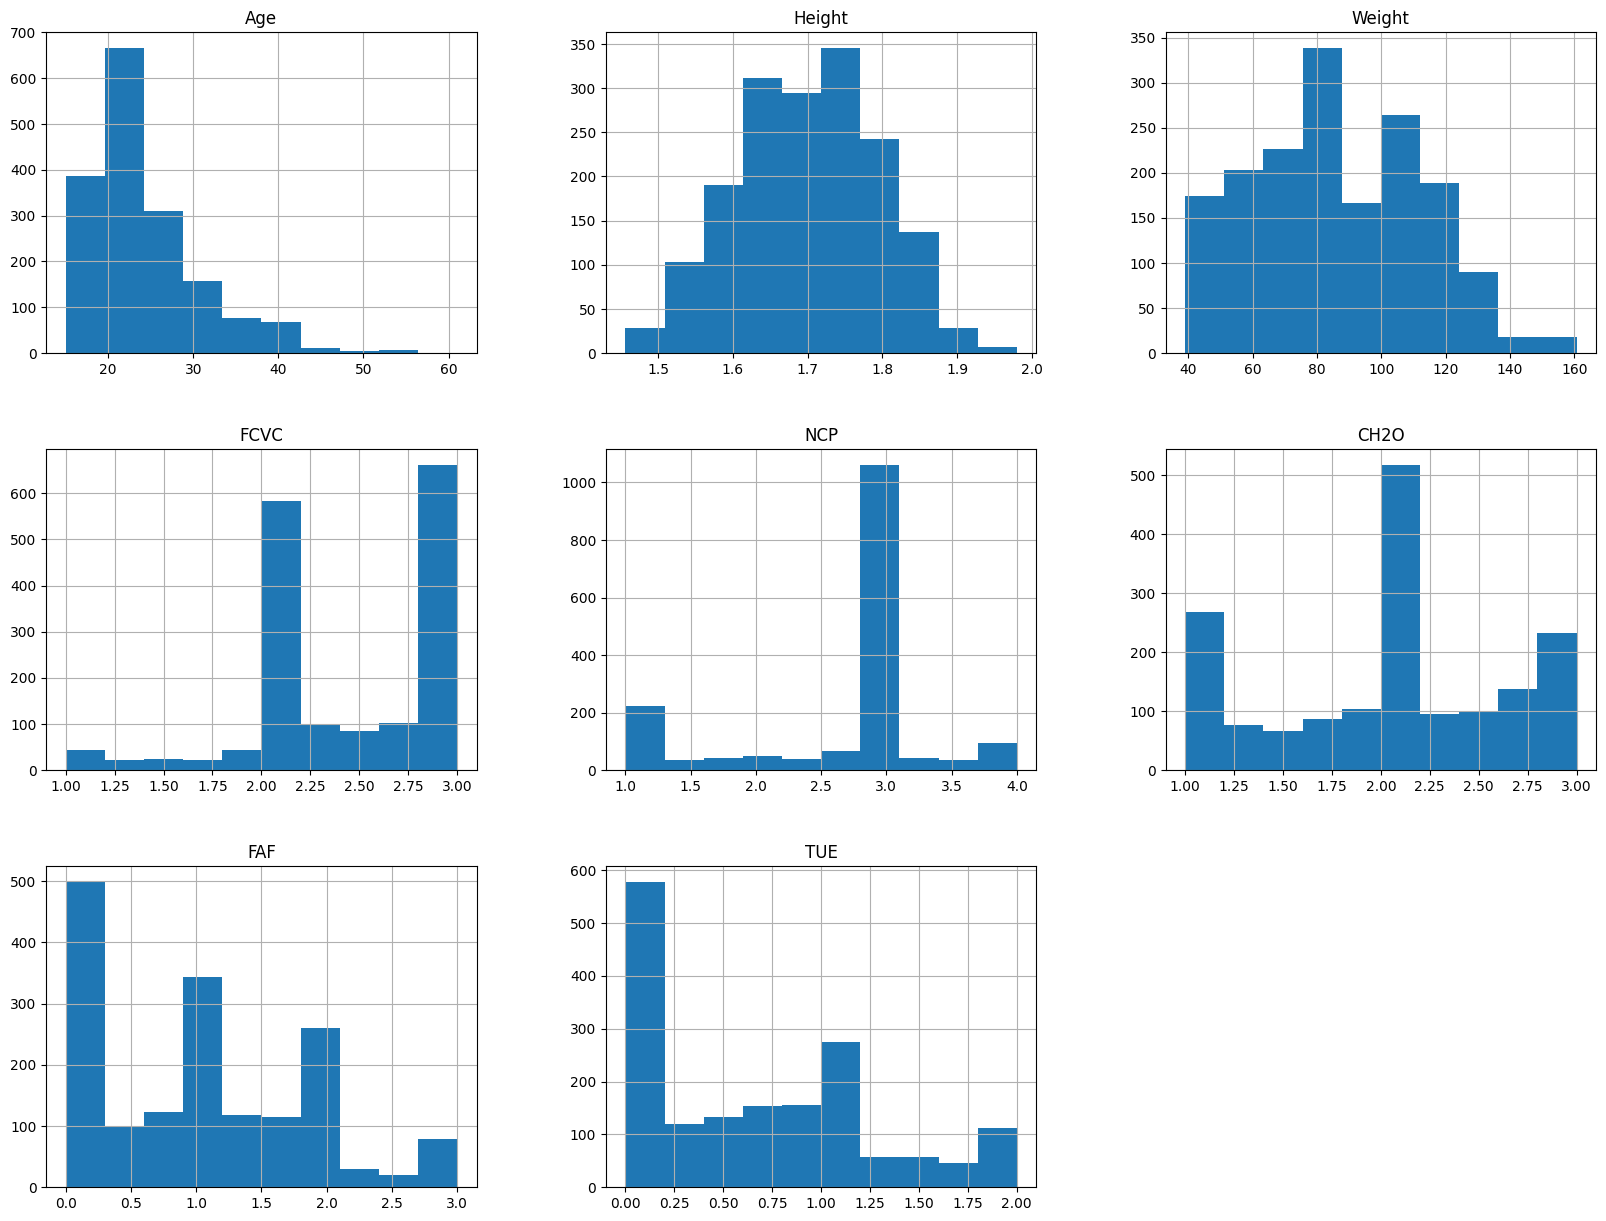

In [43]:
# Histogram of our training data

X_train.hist(figsize=(20, 15))

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Height', ylabel='Age'>,
        <Axes: xlabel='Weight', ylabel='Age'>,
        <Axes: xlabel='FAF', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='FAF', ylabel='Height'>],
       [<Axes: xlabel='Age', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='FAF', ylabel='Weight'>],
       [<Axes: xlabel='Age', ylabel='FAF'>,
        <Axes: xlabel='Height', ylabel='FAF'>,
        <Axes: xlabel='Weight', ylabel='FAF'>,
        <Axes: xlabel='FAF', ylabel='FAF'>]], dtype=object)

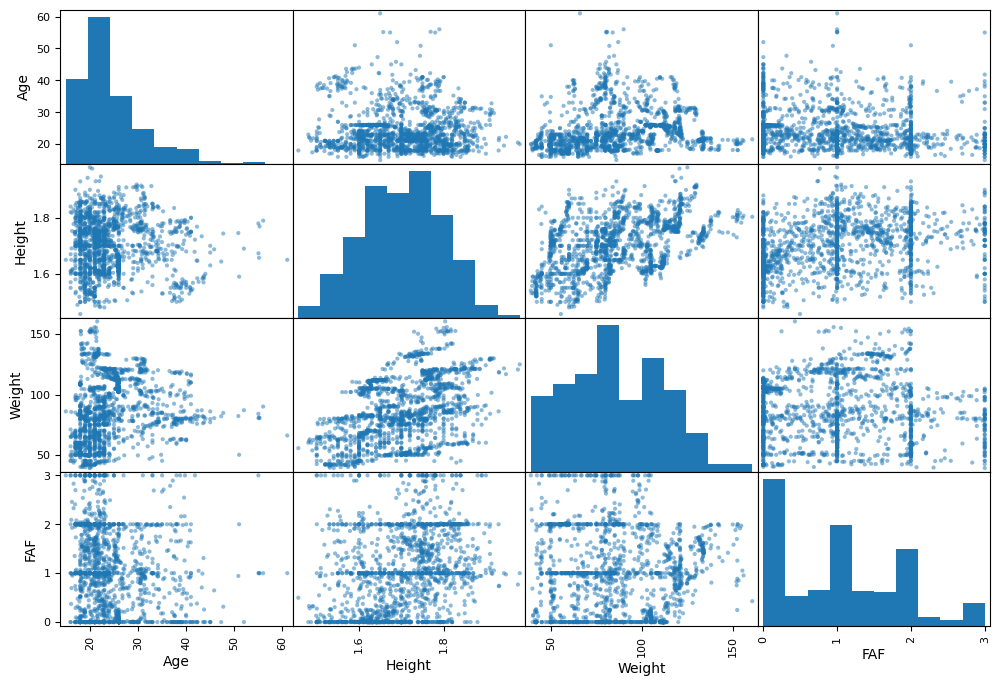

In [46]:
# Scatter matrix of select continuous attrributes

attributes = ["Age", "Height", "Weight", "FAF"]

scatter_matrix(X_train[attributes], figsize=(20, 15))

<Axes: xlabel='NObeyesdad'>

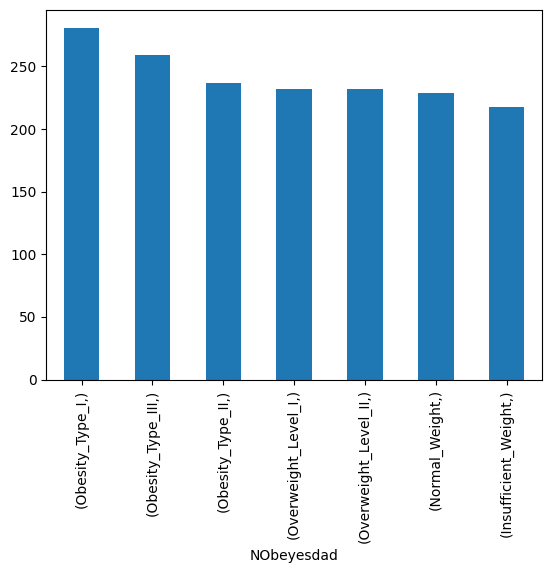

In [51]:
# Bar chart of counts of our target data
y_train.value_counts().plot(kind='bar')

### Step 6: Apply transformations to your data



In [56]:
features_to_transform = ['CH2O', 'FCVC']

for feature in features_to_transform:
    X_train[f'{feature}_squared'] = X_train[feature].values.reshape(-1, 1)**2
    X_train[f'{feature}_cubed'] = X_train[feature].values.reshape(-1, 1)**3
    X_train[f'{feature}_log'] = np.log(X_train[feature].values.reshape(-1, 1))
    X_train[f'{feature}_exp'] = np.exp(X_train[feature].values.reshape(-1, 1))

array([[<Axes: title={'center': 'CH2O_squared'}>,
        <Axes: title={'center': 'CH2O_cubed'}>,
        <Axes: title={'center': 'CH2O_log'}>],
       [<Axes: title={'center': 'CH2O_exp'}>,
        <Axes: title={'center': 'FCVC_squared'}>,
        <Axes: title={'center': 'FCVC_cubed'}>],
       [<Axes: title={'center': 'FCVC_log'}>,
        <Axes: title={'center': 'FCVC_exp'}>, <Axes: >]], dtype=object)

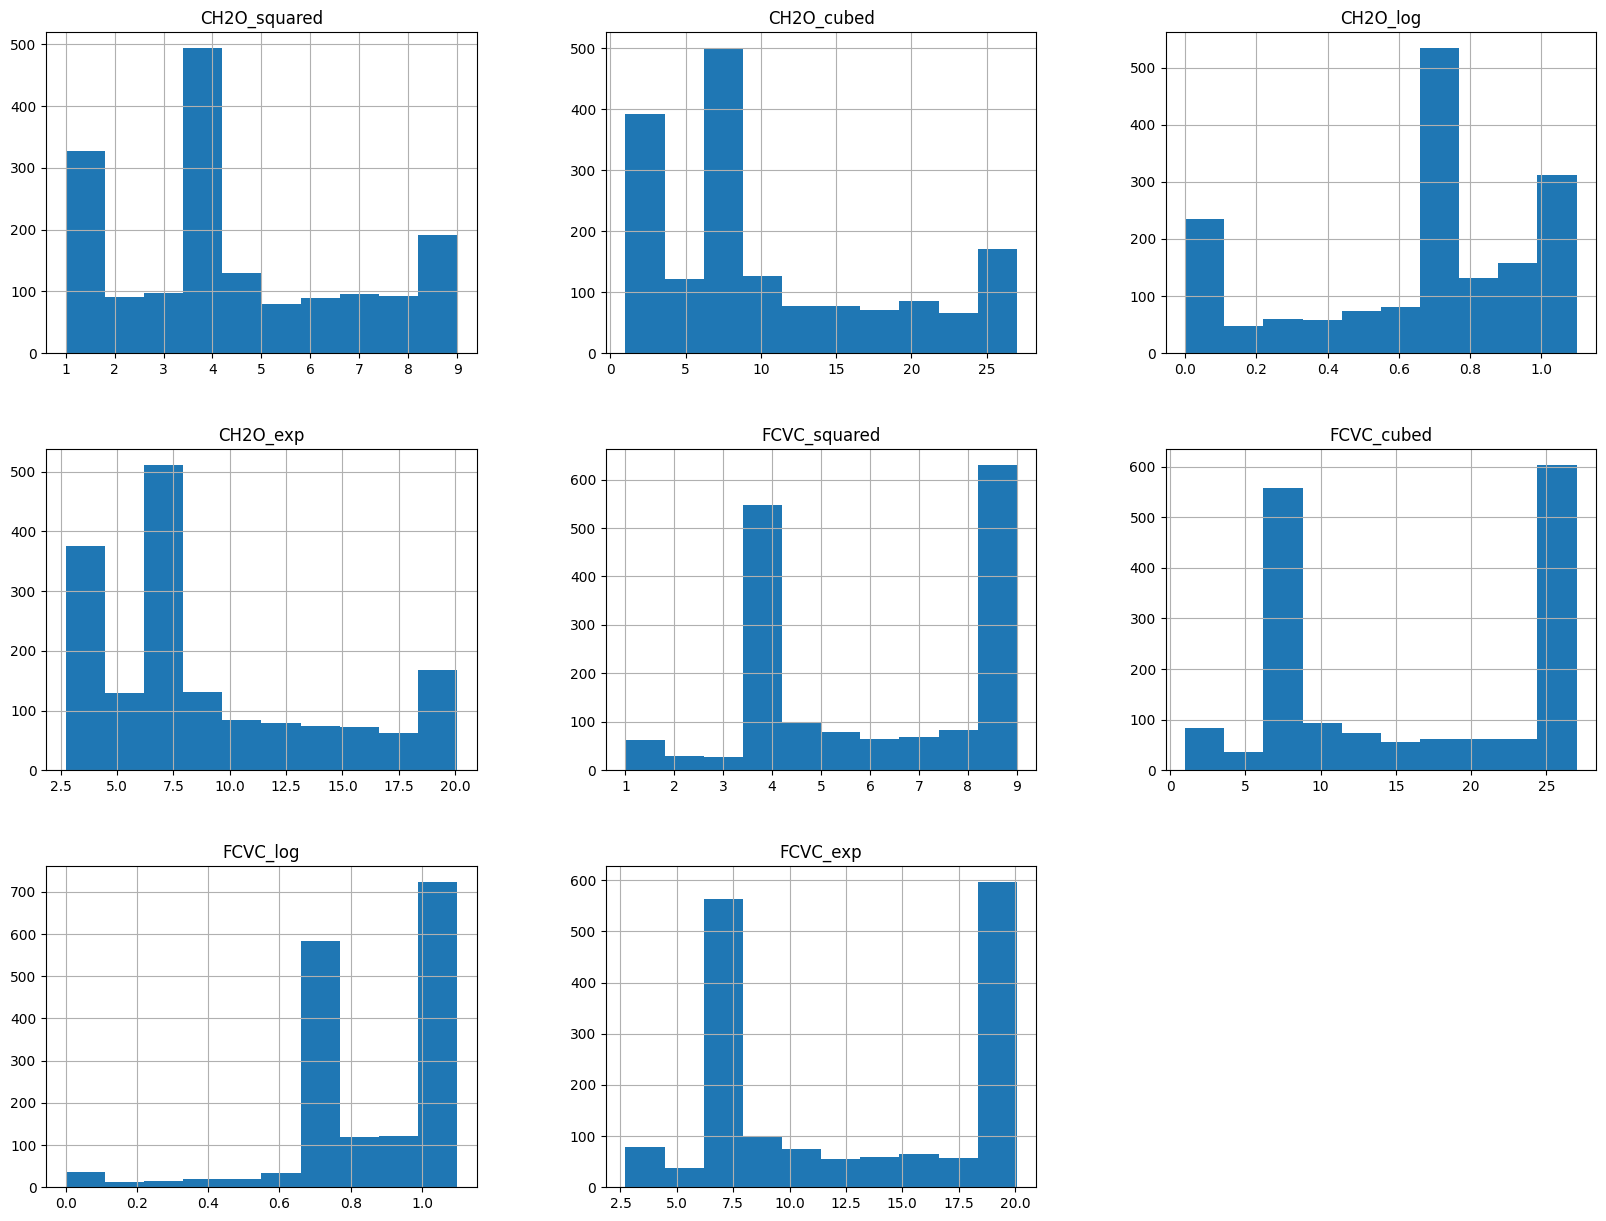

In [64]:
# Histograms of transformed features

transformed_columns = [f'{feature}_{transformation}' for feature in features_to_transform
                       for transformation in ['squared', 'cubed', 'log', 'exp']]

X_train[transformed_columns].hist(figsize=(20, 15))



array([[<Axes: xlabel='CH2O_squared', ylabel='CH2O_squared'>,
        <Axes: xlabel='CH2O_cubed', ylabel='CH2O_squared'>,
        <Axes: xlabel='CH2O_log', ylabel='CH2O_squared'>,
        <Axes: xlabel='CH2O_exp', ylabel='CH2O_squared'>,
        <Axes: xlabel='FCVC_squared', ylabel='CH2O_squared'>,
        <Axes: xlabel='FCVC_cubed', ylabel='CH2O_squared'>,
        <Axes: xlabel='FCVC_log', ylabel='CH2O_squared'>,
        <Axes: xlabel='FCVC_exp', ylabel='CH2O_squared'>],
       [<Axes: xlabel='CH2O_squared', ylabel='CH2O_cubed'>,
        <Axes: xlabel='CH2O_cubed', ylabel='CH2O_cubed'>,
        <Axes: xlabel='CH2O_log', ylabel='CH2O_cubed'>,
        <Axes: xlabel='CH2O_exp', ylabel='CH2O_cubed'>,
        <Axes: xlabel='FCVC_squared', ylabel='CH2O_cubed'>,
        <Axes: xlabel='FCVC_cubed', ylabel='CH2O_cubed'>,
        <Axes: xlabel='FCVC_log', ylabel='CH2O_cubed'>,
        <Axes: xlabel='FCVC_exp', ylabel='CH2O_cubed'>],
       [<Axes: xlabel='CH2O_squared', ylabel='CH2O_log'>,
    

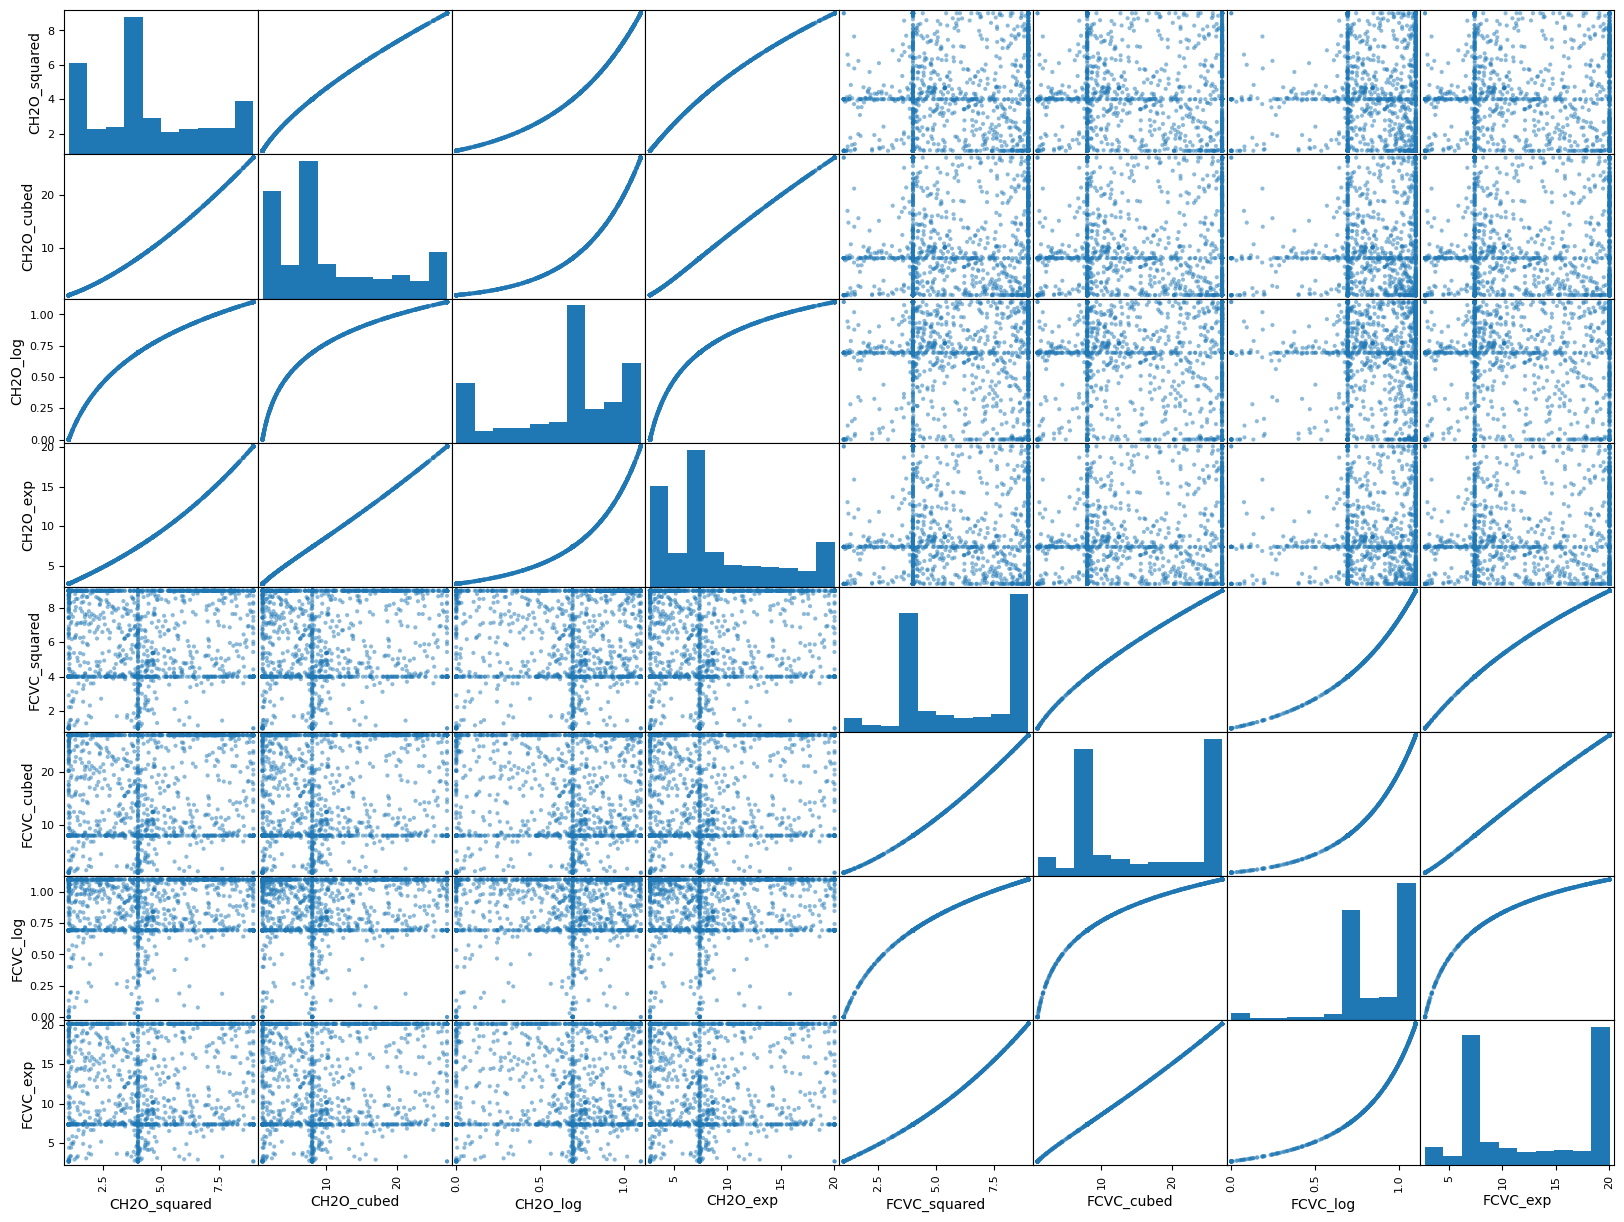

In [66]:
# Scatter matrix of transformed features

scatter_matrix(X_train[transformed_columns], figsize=(20, 15))